## Data Exploration

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [2]:
# load dataset
data_load_path = '../data/clean/'
data_load_name = 'cleaned_solar_irradiation.csv'
cleaned_df= pd.read_csv(data_load_path + data_load_name)
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2018-12-31,12,2018-12-31,8.037500,10.700000,95.250000,1024.725000,292.500000,2.575000,0.000000,32.750000,32.750000
1,2019-01-01,1,2019-01-01,6.862500,12.212500,94.250000,1020.687500,290.875000,5.437500,9.750000,36.125000,37.000000
2,2019-01-02,1,2019-01-02,4.188889,7.600000,73.444444,1027.588889,345.111111,4.544444,8.333333,47.666667,48.555556
3,2019-01-03,1,2019-01-03,3.555556,8.977778,80.333333,1029.488889,342.888889,2.533333,3.333333,50.333333,50.555556
4,2019-01-04,1,2019-01-04,3.187500,9.025000,83.250000,1028.237500,314.625000,4.050000,2.750000,52.500000,53.250000


In [3]:
# Descriptive statistics summary
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,6.456140,12.493426,17.362442,71.241653,1008.325893,196.494098,4.612259,205.173424,121.728440,221.326795
std,3.418265,6.254529,7.625561,11.555519,10.185242,78.452914,2.207016,209.998809,58.174154,127.217878
min,1.000000,-5.360000,2.260000,37.200000,969.455556,8.888889,0.846667,0.000000,27.900000,27.900000
25%,3.500000,7.813889,11.284444,63.029412,1002.284872,156.907143,2.970294,19.444444,72.488636,112.466667
50%,6.000000,12.106667,16.376923,71.800000,1009.320000,214.222222,4.164706,128.062500,113.923077,198.705882
75%,9.000000,17.629186,22.445989,79.888889,1015.251584,248.275000,5.935417,351.075630,167.728507,315.101961
max,12.000000,32.493750,41.793333,98.111111,1040.200000,351.312500,14.690000,738.923077,261.875000,501.933333


In [4]:
# check the missing values
cleaned_df.isnull().sum()

Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_DHI          0
Daily_radiation    0
dtype: int64

In [5]:
# summary of dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1083 non-null   object 
 1   MonthPE          1083 non-null   int64  
 2   Date             1083 non-null   object 
 3   Daily_Temp       1083 non-null   float64
 4   Daily_Precip     1083 non-null   float64
 5   Daily_Humidity   1083 non-null   float64
 6   Daily_Pressure   1083 non-null   float64
 7   Daily_WindDir    1083 non-null   float64
 8   Daily_WindSpeed  1083 non-null   float64
 9   Daily_DNI        1083 non-null   float64
 10  Daily_DHI        1083 non-null   float64
 11  Daily_radiation  1083 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 101.7+ KB


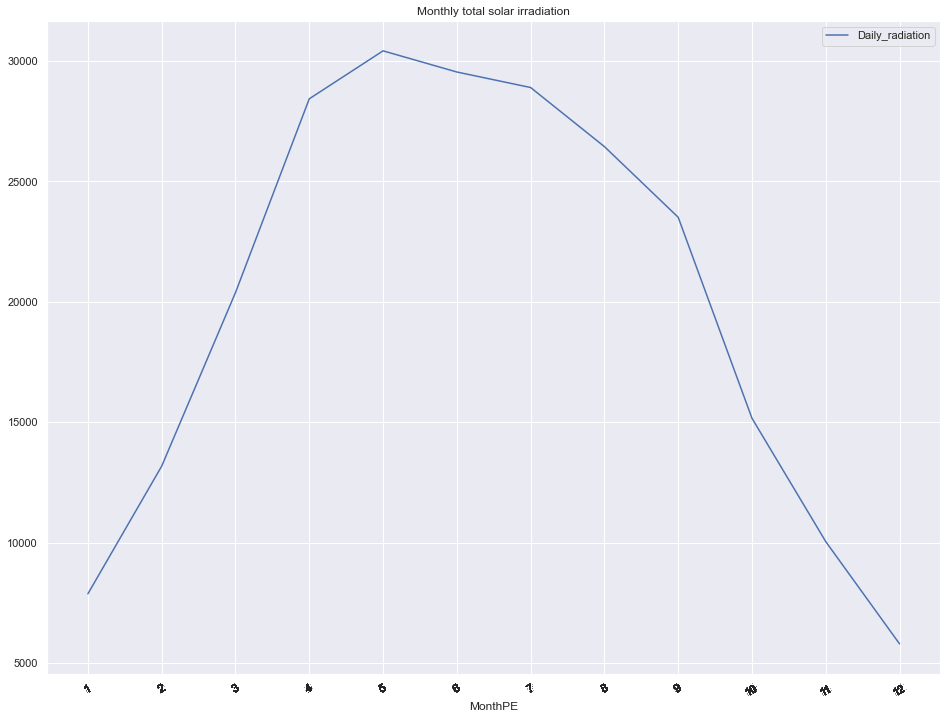

In [6]:
# A plot pf total irriadtion for each 
rad_vs_month= cleaned_df.loc[:, ['Daily_radiation', 'MonthPE']].groupby('MonthPE').sum()
rad_vs_month.plot()
plt.xticks(cleaned_df['MonthPE'], rotation=30)
plt.title('Monthly total solar irradiation')
plt.show()

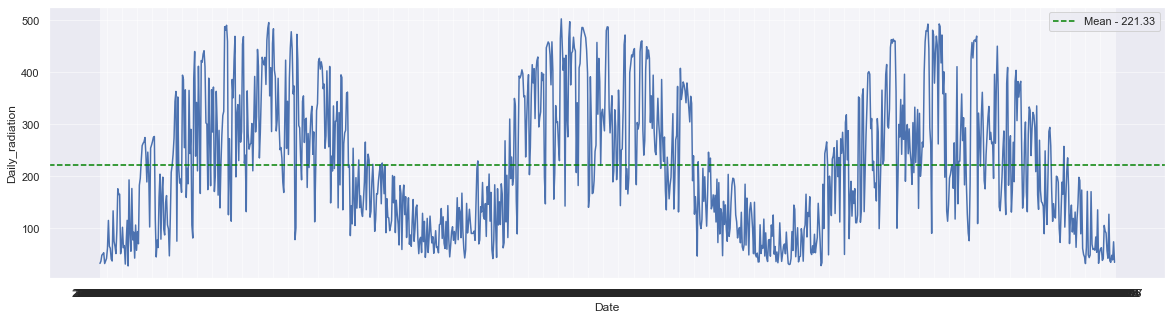

In [7]:
# Daily solar irradiation plot
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data= cleaned_df, x="Date", y="Daily_radiation")

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
#ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

ax.legend()
plt.show()


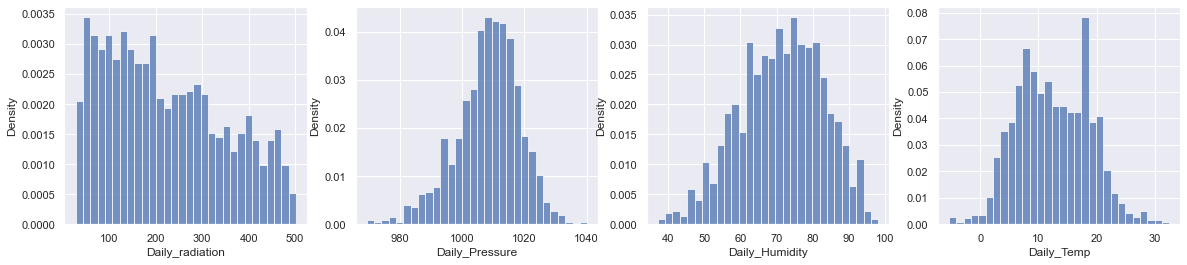

In [8]:
# Histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[3])
plt.show()

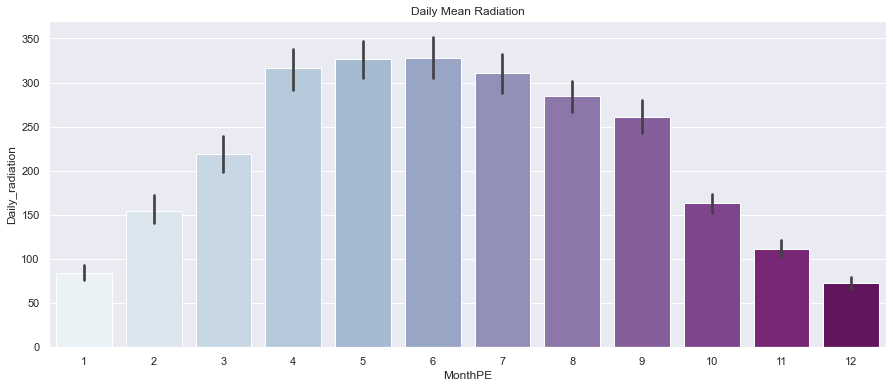

In [9]:
# Histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

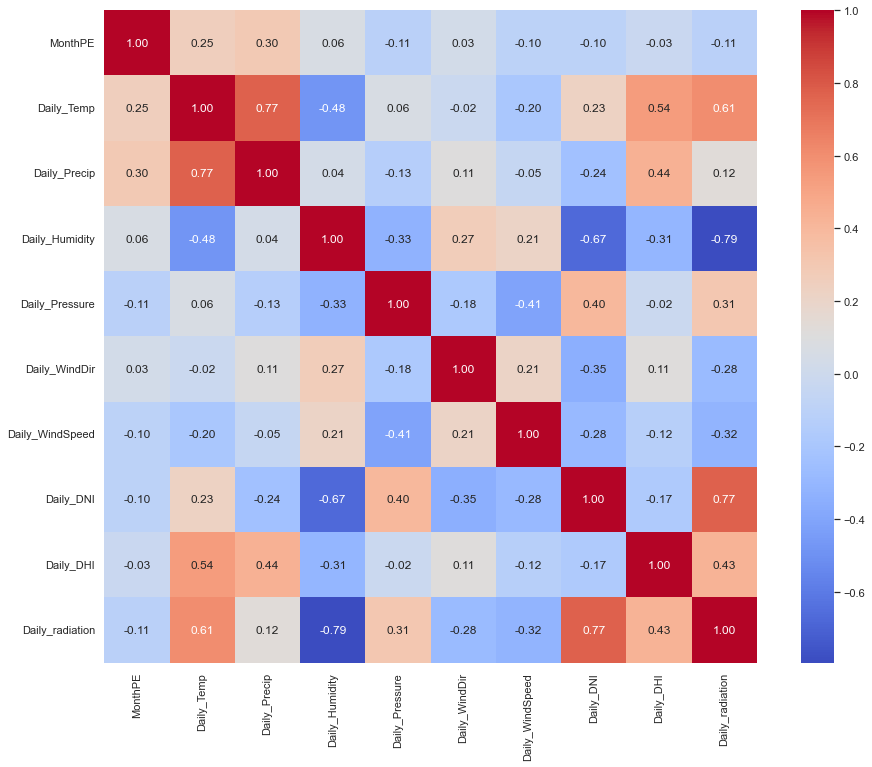

In [10]:
# feature correlation
corr= cleaned_df.corr(method = "pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

### Statistical check: stationary or non-stationary

In [11]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # p-value <= 0.05

ADF Statistic: -3.554289
p-value: 0.006698
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
